In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
sc.settings.verbosity = 0
#from anndata import AnnData
import scipy
#from numpy.linalg import svd


import warnings
warnings.filterwarnings("ignore")


In [2]:
try:
    from sys import path as syspath
    from os import path as ospath
    syspath.append(ospath.join(ospath.expanduser("~"), 'Documents/git/Xct'))

    from scTenifoldXct.main import *
    import scTenifoldXct.dNN as dNN    
    import scTenifoldXct.visualization as vis
    
except ImportError:
    print('Module not found')

In [3]:
ada = sc.read_h5ad("../data/HCC_processed_v2.h5ad")
ada

AnnData object with n_obs × n_vars = 4096 × 2608
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'patient_id', 'patient_tumorsection', 'NormalvsTumor', 'patientno', 'PNC', 'PIC', 'ViralvsNonViral', 'ident', 'batch'
    var: 'gene_ids', 'n_cells'
    obsm: 'X_pca', 'X_umap'
    layers: 'log1p', 'raw'

In [4]:
#ada.obs.rename({'indent': 'ident'}, axis=1, inplace=True)

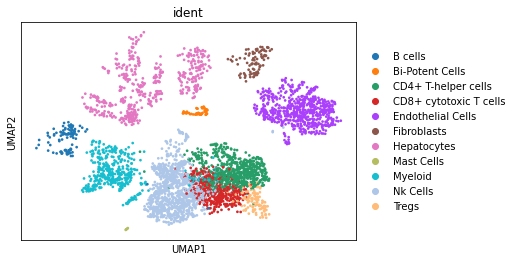

In [5]:
sc.pl.umap(ada, color='ident')

In [6]:
ada_N = ada[ada.obs['NormalvsTumor'] == 'N', :].copy()
ada_T = ada[ada.obs['NormalvsTumor'] == 'T', :].copy()
ada_N.shape, ada_T.shape

((2057, 2608), (2039, 2608))

In [7]:
ada_T.obs['ident'].value_counts()

Hepatocytes               462
CD4+ T-helper cells       422
CD8+ cytotoxic T cells    273
Endothelial Cells         272
Nk Cells                  221
Myeloid                   189
Tregs                      99
Fibroblasts                59
B cells                    39
Mast Cells                  2
Bi-Potent Cells             1
Name: ident, dtype: int64

In [8]:
ada_N.obs['ident'].value_counts()

Nk Cells                  801
Endothelial Cells         386
CD4+ T-helper cells       260
Myeloid                   225
CD8+ cytotoxic T cells    191
B cells                    65
Bi-Potent Cells            53
Fibroblasts                36
Tregs                      19
Hepatocytes                18
Mast Cells                  3
Name: ident, dtype: int64

## tumor vs adjacent normal:

In [9]:
# obj1 = Xct(ada_T, 'Hepatocytes', 'Endothelial Cells', build_GRN = True, save_GRN = True, 
#           pcNet_name = 'Net_Hep2Endo_T', mode = 'full', verbose=True)

obj1 = Xct(ada_T, 'Hepatocytes', 'Endothelial Cells', build_GRN = False,
           pcNet_name = 'Net_Hep2Endo_T', mode = 'full', verbose=True)

print(obj1)

init an Xct object for interactions from Hepatocytes (462) to Endothelial Cells (272)...
loading GRNs...
building correspondence...
init completed.

Xct object for interactions from Hepatocytes (462) to Endothelial Cells (272)
# of genes = 2608 X 2608 
Correspondence = 5216 X 5216


In [10]:
df1 = obj1.fill_metric()
df1

,ligand,receptor,mean_L,mean_R,var_L,var_R,disp_L,disp_R,cv_L,cv_R,cv_res_L,cv_res_R
186,NID1,PTPRF,0.033262,0.005097,0.025957,0.003507,0.780388,0.688052,4.843746,11.618962,-0.012730,-0.022462
271,IL1B,PLAUR,0.001500,0.036930,0.001038,0.032931,0.691649,0.891718,21.470945,4.913868,0.006375,0.066800
274,KNG1,PLAUR,0.523149,0.036930,0.689779,0.032931,1.318514,0.891718,1.587558,4.913868,0.094586,0.066800
275,VTN,PLAUR,1.317913,0.036930,2.115814,0.032931,1.605428,0.891718,1.103703,4.913868,-0.050679,0.066800
276,PLG,PLAUR,0.148717,0.036930,0.169688,0.032931,1.141013,0.891718,2.769904,4.913868,0.038519,0.066800
...,...,...,...,...,...,...,...,...,...,...,...,...
7967,ANGPTL4,GPIHBP1,0.092515,0.040536,0.083921,0.033514,0.907107,0.826763,3.131294,4.516161,-0.032411,0.043657
7979,S100A8,CD68,0.001500,0.005097,0.001038,0.003507,0.691651,0.688052,21.470982,11.618963,0.006375,-0.022462
7980,S100A9,CD68,0.055646,0.005097,0.113773,0.003507,2.044574,0.688052,6.061553,11.618963,0.349656,-0.022462
7984,TF,TFR2,0.697570,0.002548,0.913951,0.001760,1.310194,0.690599,1.370484,16.462086,0.077224,-0.017941


In [11]:
# obj11 = Xct(ada_N, 'Hepatocytes', 'Endothelial Cells', build_GRN = True, save_GRN = True, 
#           pcNet_name = 'Net_Hep2Endo_N', mode = 'full', verbose=True)


obj11 = Xct(ada_N, 'Hepatocytes', 'Endothelial Cells', build_GRN = False,
           pcNet_name = 'Net_Hep2Endo_N', mode = 'full', verbose=True)

print(obj11)

init an Xct object for interactions from Hepatocytes (18) to Endothelial Cells (386)...
loading GRNs...
building correspondence...
init completed.

Xct object for interactions from Hepatocytes (18) to Endothelial Cells (386)
# of genes = 2608 X 2608 
Correspondence = 5216 X 5216


In [12]:
df11 = obj11.fill_metric()
df11

,ligand,receptor,mean_L,mean_R,var_L,var_R,disp_L,disp_R,cv_L,cv_R,cv_res_L,cv_res_R
274,KNG1,PLAUR,0.138050,0.113438,0.101378,0.103768,0.734358,0.914752,2.306403,2.839697,-0.001929,0.070885
275,VTN,PLAUR,0.495614,0.113438,0.467505,0.103768,0.943283,0.914752,1.379587,2.839697,0.100510,0.070885
276,PLG,PLAUR,0.077016,0.113438,0.047452,0.103768,0.616131,0.914752,2.828427,2.839697,-0.039549,0.070885
375,APOE,APP,0.276101,0.375405,0.164641,0.243506,0.596308,0.648649,1.469608,1.314482,-0.107860,-0.130097
393,IGF2,PDGFRB,0.099542,0.024354,0.083836,0.028555,0.842215,1.172486,2.908760,6.938555,0.052506,0.169175
...,...,...,...,...,...,...,...,...,...,...,...,...
7440,SAA1,SCARB1,0.381496,0.016161,0.363564,0.010941,0.952995,0.676988,1.580521,6.472172,0.015489,-0.040916
7442,APOE,SCARB1,0.276101,0.016161,0.164641,0.010941,0.596308,0.676988,1.469608,6.472172,-0.107860,-0.040916
7728,HP,ASGR1,1.230502,0.010774,1.034765,0.007352,0.840930,0.682373,0.826683,7.958228,0.091642,-0.034609
7967,ANGPTL4,GPIHBP1,0.038508,0.081515,0.025209,0.084282,0.654639,1.033951,4.123106,3.561491,-0.002437,0.090003


In [13]:
#selected LR pairs
candidates = get_candidates(df1)
print(len(candidates))

candidates11 = get_candidates(df11)
print(len(candidates11))

314
101


In [14]:
candidates_union = list(set(candidates).union(set(candidates11)))
len(candidates_union)

337

In [15]:
candidates_inter = list(set(candidates).intersection(set(candidates11)))
len(candidates_inter)

78

## mode 'full':

In [16]:
obj1._w.shape, obj11._w.shape

((5216, 5216), (5216, 5216))

In [17]:
counts_np1 = get_counts_np(obj1, obj11)
len(counts_np1), counts_np1[0].shape, counts_np1[1].shape, counts_np1[2].shape, counts_np1[3].shape

(4, (2608, 462), (2608, 272), (2608, 18), (2608, 386))

In [18]:
W = build_W(obj1, obj11)
W.shape

(10432, 10432)

In [19]:
projections, losses = dNN.train_and_project(counts_np1, w = W, dim = 2, steps = 1000, lr = 0.01)

Net(
  (linear1): Linear(in_features=462, out_features=120, bias=True)
  (linear2): Linear(in_features=120, out_features=30, bias=True)
  (linear3): Linear(in_features=30, out_features=2, bias=True)
)
Net(
  (linear1): Linear(in_features=272, out_features=92, bias=True)
  (linear2): Linear(in_features=92, out_features=23, bias=True)
  (linear3): Linear(in_features=23, out_features=2, bias=True)
)
Net(
  (linear1): Linear(in_features=18, out_features=24, bias=True)
  (linear2): Linear(in_features=24, out_features=6, bias=True)
  (linear3): Linear(in_features=6, out_features=2, bias=True)
)
Net(
  (linear1): Linear(in_features=386, out_features=108, bias=True)
  (linear2): Linear(in_features=108, out_features=27, bias=True)
  (linear3): Linear(in_features=27, out_features=2, bias=True)
)
1 8363.275390625
100 717.928955078125
200 636.689453125
300 628.7471923828125
400 635.1658935546875
500 624.3189697265625
600 622.9600830078125
700 621.8803100585938
800 620.9594116210938
900 620.1801757

In [20]:
projections.shape

(10432, 2)

In [21]:
projections_split = np.array_split(projections, 2) #return a list of ndarray
projections_split[0].shape, projections_split[1].shape

((5216, 2), (5216, 2))

In [22]:
df_nn1 = nn_aligned_dist(obj1, projections_split[0])
df_nn11 = nn_aligned_dist(obj11, projections_split[1])

df_nn1.head()

computing pair-wise distances...
manifold aligned # of pairs: 6801664
adding column 'rank'...
adding column 'correspondence_score'...
computing pair-wise distances...
manifold aligned # of pairs: 6801664
adding column 'rank'...
adding column 'correspondence_score'...


,idx,dist,rank,correspondence_score
SERPING1_MTUS1,"(1423, 1170)",0.000001,1,42.328464
CES2_GADD45B,"(2028, 2351)",0.000002,2,52.362109
CES2_APP,"(2028, 2576)",0.000002,3,50.635516
ASGR2_FLT1,"(2091, 1753)",0.000003,4,52.803714
SOD2_EGFL7,"(938, 1349)",0.000003,5,64.168844


In [23]:
df_nn_all = nn_aligned_dist_diff(df_nn1, df_nn11)

df_nn_all

,idx,dist,rank,correspondence_score,idx,dist,rank,correspondence_score,diff2,diff2_rank
TFF3_SPP1,"(2592, 671)",0.000079,1652,199.391198,"(2592, 671)",0.020935,3260812,2.380643e-24,4.349816e-04,1
PLA2G2A_SPP1,"(42, 671)",0.000141,3015,189.763902,"(42, 671)",0.020935,3260664,2.380643e-24,4.323884e-04,2
MT1H_MT1A,"(2017, 2015)",0.021599,5015184,0.000628,"(2017, 2015)",0.000826,10541,2.043973e+02,4.315330e-04,3
HIST1H1C_SPP1,"(845, 671)",0.000569,12226,133.839731,"(845, 671)",0.020935,3261382,2.380643e-24,4.147752e-04,4
TFF1_SPP1,"(2594, 671)",0.000865,18394,111.545060,"(2594, 671)",0.020935,3261298,2.380643e-24,4.027788e-04,5
...,...,...,...,...,...,...,...,...,...,...
THBS3_ZNF717,"(192, 519)",0.022393,5935527,0.001255,"(192, 519)",0.022393,4270550,1.191435e-24,3.469447e-18,6801660
MICALL2_C19orf68,"(949, 2473)",0.021027,4486731,0.008764,"(949, 2473)",0.021027,3294873,3.567584e-24,3.469447e-18,6801661
FAM149A_CLEC3B,"(715, 475)",0.015366,1919768,0.028544,"(715, 475)",0.015366,1564756,4.252626e-23,3.469447e-18,6801662
MGAT4B_COCH,"(820, 1801)",0.020879,4363275,0.008448,"(820, 1801)",0.020879,3247281,9.436900e-24,3.469447e-18,6801663


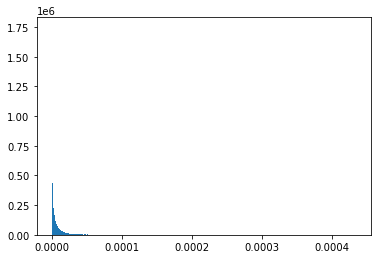

In [24]:
plt.hist(df_nn_all['diff2'], bins=1000)
plt.show()

In [25]:
df_enriched_diff = chi2_diff_test(df_nn_all, candidates=candidates_union)
df_enriched_diff


Total enriched: 71 / 6801664


,idx,dist,rank,correspondence_score,idx,dist,rank,correspondence_score,diff2,diff2_rank,p_val,enriched_rank
PLA2G2A_ITGA5,"(42, 1671)",0.000926,19643,63.442870,"(42, 1671)",0.014099,1220587,5.472059e-23,0.000174,1593,0.000001,1
TFF3_ACKR3,"(2592, 433)",0.009160,372461,4.894421,"(2592, 433)",0.021326,3445622,4.467115e-24,0.000148,4986,0.000006,2
TFF3_GHR,"(2592, 736)",0.011039,773024,3.013985,"(2592, 736)",0.022334,4181943,1.191439e-24,0.000128,13060,0.000028,3
IGF2_PDGFRB,"(1381, 803)",0.021443,4857717,0.002204,"(1381, 803)",0.010598,408317,1.563338e+00,0.000118,18998,0.000057,4
CXCL3_ACKR1,"(657, 201)",0.005972,148765,9.877160,"(657, 201)",0.016524,1825520,2.374391e-23,0.000111,23461,0.000090,5
...,...,...,...,...,...,...,...,...,...,...,...,...
CXCL13_ACKR1,"(666, 201)",0.011040,773126,0.543774,"(666, 201)",0.016524,1826375,2.374391e-23,0.000030,348913,0.041772,67
AREG_KDR,"(660, 638)",0.009128,368481,2.793449,"(660, 638)",0.014530,1350383,3.688486e-23,0.000029,365185,0.044935,68
EFNA1_ERBB2,"(190, 2141)",0.011991,1042423,0.420291,"(190, 2141)",0.017342,2083371,3.847612e-02,0.000029,375719,0.046980,69
ADM_RAMP3,"(1394, 982)",0.007182,206407,5.545638,"(1394, 982)",0.012504,759519,1.754966e-22,0.000028,380885,0.048173,70


In [26]:
# df_enriched_diff.to_excel('HCC_compare.xlsx')

#### GSEA:

In [27]:
genelist = get_genelist(df_enriched_diff, saveas='heart_diff')
len(genelist)

62

In [29]:
import gseapy as gp

enr = gp.enrichr(gene_list= genelist,
                 gene_sets= 'BioPlanet_2019', #'GO_Biological_Process_2021',
                 organism='Human', 
                 outdir=None, #'enrichr_kegg',
                 no_plot=True,
                 cutoff=0.05 
                )

In [30]:
enr.results.head(10)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,BioPlanet_2019,Cytokine-cytokine receptor interaction,21/265,1.876340e-24,7.223908e-22,0,0,41.340864,2.258564e+03,PDGFRB;CXCL6;CXCL8;FLT1;FLT4;PDGFB;CXCL1;CXCL1...
1,BioPlanet_2019,Signal transduction,30/1020,1.046807e-22,2.015104e-20,0,0,17.943182,9.081247e+02,CXCL6;NRP1;NRP2;CXCL8;FLT1;CALCRL;ITGB5;FLT4;A...
2,BioPlanet_2019,Binding of chemokines to chemokine receptors,11/54,8.591250e-18,1.102544e-15,0,0,99.792522,3.921426e+03,CXCL6;CXCL10;CXCL11;CXCL8;CCL2;ACKR3;CXCL1;CXC...
3,BioPlanet_2019,"TNF-alpha effects on cytokine activity, cell m...",13/135,2.098088e-16,2.019409e-14,0,0,43.092673,1.555660e+03,VCAM1;CXCL8;FLT4;PDGFB;CXCL1;CXCL3;EFNA1;CXCL1...
4,BioPlanet_2019,Neurophilin interactions with VEGF and VEGF re...,5/5,2.426863e-13,1.868684e-11,0,0,99690.000000,2.895696e+06,NRP1;NRP2;FLT1;KDR;VEGFA
5,BioPlanet_2019,Signaling by VEGF,6/11,3.158089e-13,2.026440e-11,0,0,427.135714,1.229452e+04,NRP1;NRP2;FLT1;FLT4;KDR;VEGFA
6,BioPlanet_2019,Peptide G-protein coupled receptors,12/192,6.157483e-13,3.386616e-11,0,0,26.344000,7.406863e+02,CXCL10;CXCL6;CXCL11;CXCL8;ACKR3;CCL2;CXCL1;ACK...
7,BioPlanet_2019,GPCR ligand binding,15/410,1.422643e-12,6.846468e-11,0,0,15.790197,4.307330e+02,CXCL6;CXCL8;RAMP3;CALCRL;ADM;CXCL1;CXCL13;CXCL...
8,BioPlanet_2019,Malaria,8/51,3.061068e-12,1.309457e-10,0,0,68.544358,1.817266e+03,CXCL8;VCAM1;SDC2;CCL2;SDC1;CD36;ACKR1;TLR4
9,BioPlanet_2019,Focal adhesion,12/233,6.080268e-12,2.340903e-10,0,0,21.412127,5.529890e+02,PDGFRB;FLT1;ITGB5;FLT4;ERBB2;KDR;SPP1;PDGFB;IT...


In [ ]:
# enr.results.to_excel('HCC_compare_enrichr.xlsx')

#### vis:

In [31]:
Xct.add_names_to_nets(obj1)
Xct.add_names_to_nets(obj11)

completed.
completed.


In [32]:
targets = vis.get_Xct_pairs(df_enriched_diff)
len(targets)

71

In [ ]:
targets

In [45]:
scale_factor = 10

identified 137 TF(s) along with 4 ligand/receptor target gene(s)
undirected graph constructed: 
# of nodes: 21, # of edges: 20

identified 140 TF(s) along with 4 ligand/receptor target gene(s)
undirected graph constructed: 
# of nodes: 34, # of edges: 60

graphs merged: 
# of nodes: 55, # of edges: 80

edge from VEGFA to NRP1 added
edge from VEGFA to NRP2 added
edge from VEGFA to FLT4 added
edge from VEGFA to FLT1 added


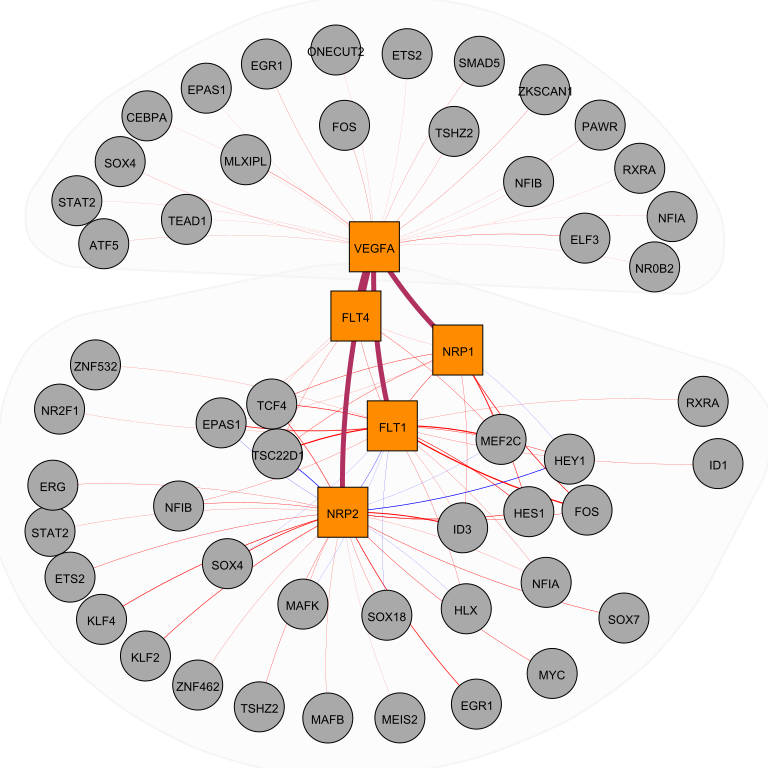

In [51]:
g1 = vis.plot_pcNet(obj1, view='sender', gene_names=[targets[24][0], targets[26][0], targets[29][0], targets[35][0]], 
                    top_edges=20, show = False, verbose = True)
g2 = vis.plot_pcNet(obj1, view='receiver', gene_names=[targets[24][1], targets[26][1], targets[29][1], targets[35][1]], 
                    top_edges=60, show = False, verbose = True)

vis.plot_XNet(g1, g2, Xct_pair = [targets[24], targets[26], targets[29], targets[35]], 
              verbose = True, edge_width_scale=scale_factor)

In [47]:
g11 = vis.plot_pcNet(obj11, view='sender', gene_names=[targets[24][0], targets[26][0], targets[29][0], targets[35][0]], 
              match_fig=g1, show = False, verbose = True, edge_width_scale=scale_factor)

g22 = vis.plot_pcNet(obj11, view='receiver', gene_names=[targets[24][1], targets[26][1], targets[29][1], targets[35][1]], 
             match_fig=g2, show = False, verbose = True, edge_width_scale=scale_factor)

vis.plot_XNet(g11, g22, Xct_pair = [targets[24], targets[26], targets[29], targets[35]], verbose = True, edge_width_scale=scale_factor)

identified 137 TF(s) along with 4 ligand/receptor target gene(s)


ValueError: target gene VEGFA VEGFA VEGFA VEGFA generated 0 edge...

identified 140 TF(s) along with 4 ligand/receptor target gene(s)
undirected graph constructed: 
# of nodes: 34, # of edges: 126



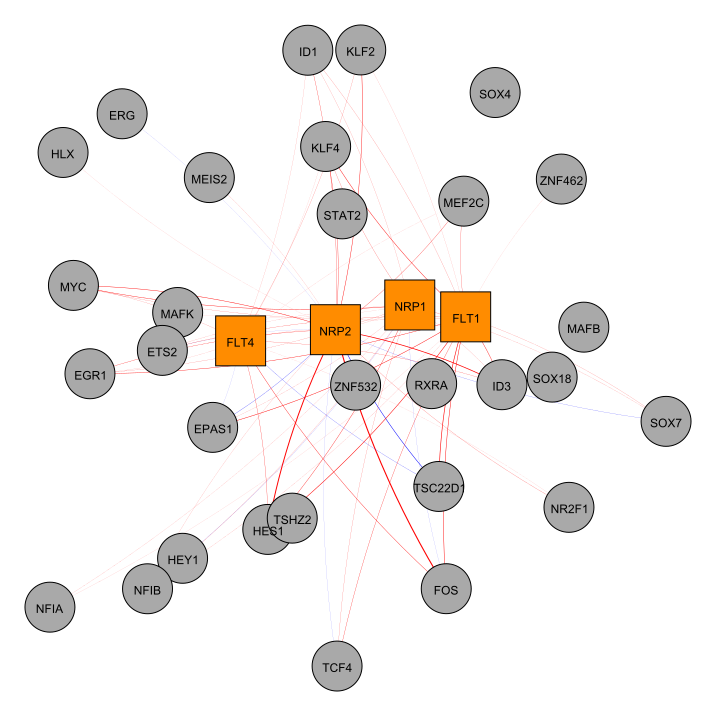

In [57]:
vis.plot_pcNet(obj11, view='receiver', gene_names=[targets[24][1], targets[26][1], targets[29][1], targets[35][1]], 
             match_fig=g2, bbox_scale=1.4, show = True, verbose = True, edge_width_scale=scale_factor, layout='drl')

identified 137 TF(s) along with 1 ligand/receptor target gene(s)
undirected graph constructed: 
# of nodes: 21, # of edges: 20

identified 137 TF(s) along with 1 ligand/receptor target gene(s)
undirected graph constructed: 
# of nodes: 21, # of edges: 20

graphs merged: 
# of nodes: 42, # of edges: 40

edge from IGF2 to FLT4 added


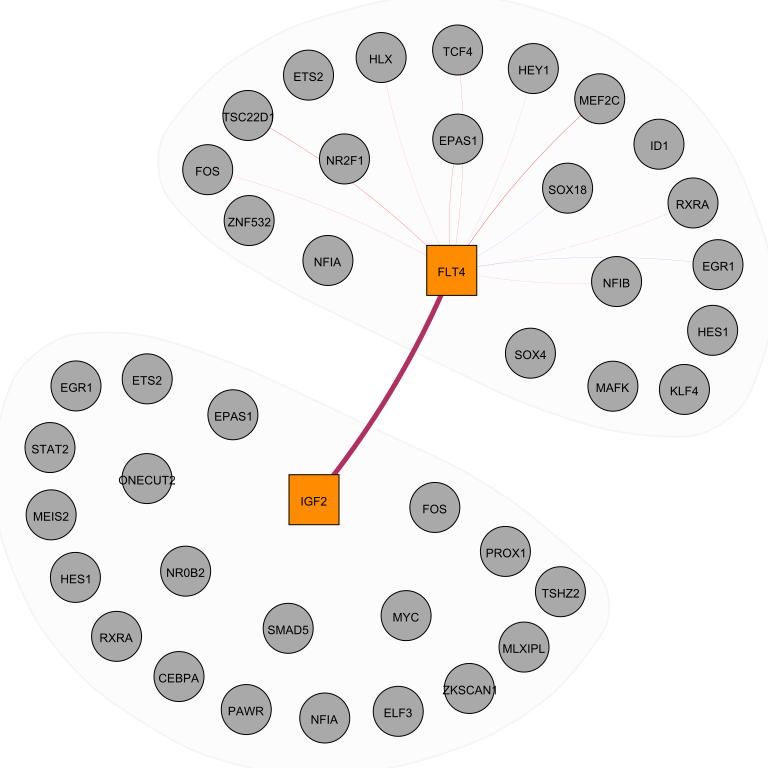

In [49]:
g1 = vis.plot_pcNet(obj1, view='sender', gene_names=[targets[55][0]], top_edges=20, show = False, verbose = True)
g2 = vis.plot_pcNet(obj1, view='receiver', gene_names=[targets[55][1]], top_edges=20, show = False, verbose = True)

vis.plot_XNet(g1, g2, Xct_pair = [targets[55]], verbose = True, edge_width_scale=scale_factor)

identified 137 TF(s) along with 1 ligand/receptor target gene(s)
undirected graph constructed: 
# of nodes: 21, # of edges: 11

identified 137 TF(s) along with 1 ligand/receptor target gene(s)
undirected graph constructed: 
# of nodes: 21, # of edges: 20

graphs merged: 
# of nodes: 42, # of edges: 31

edge from IGF2 to FLT4 added


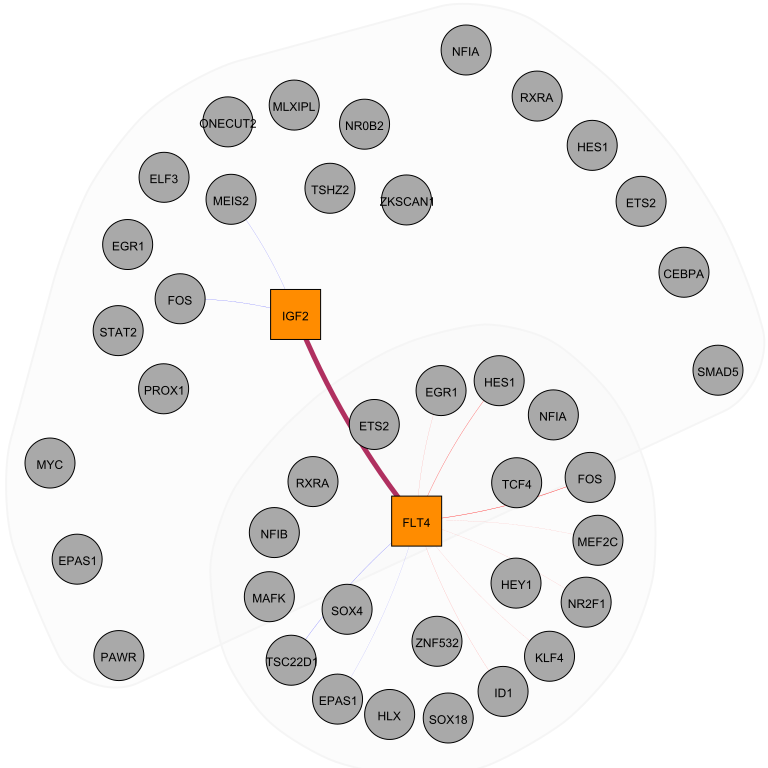

In [50]:
g11 = vis.plot_pcNet(obj11, view='sender', gene_names=[targets[55][0]], remove_isolated_nodes = False,
              match_fig=g1, show = False, verbose = True, edge_width_scale=scale_factor)

g22 = vis.plot_pcNet(obj11, view='receiver', gene_names=[targets[55][1]], 
             match_fig=g2, show = False, verbose = True, edge_width_scale=scale_factor)

vis.plot_XNet(g11, g22, Xct_pair = [targets[55]], verbose = True, edge_width_scale=scale_factor)